In [2]:
import pandas as pd
import networkx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
edmunds = pd.read_csv("C:\Users\Sean\Desktop\Fall 2016\Text_Analytics\Group Assignment 3\Assignment 3 Edmunds Posts.csv")
senti = pd.read_csv("C:\Users\Sean\Desktop\Fall 2016\Text_Analytics\Group Assignment 3\Assignment 3 Sentiment Scores.csv")

In [14]:
col = senti.columns
ar = []
for i in range(len(col)-1):
    for j in range(len(col)-1):
        if j>i:
            pos = senti[[col[i],col[j]]][(senti[col[i]]>senti[col[j]])]
            neg = senti[[col[i],col[j]]][senti[col[i]]<senti[col[j]]]
            posv = (pos[col[i]]-pos[col[j]]).sum()
            negv = (neg[col[j]]-neg[col[i]]).sum()
            sen = posv-negv
            print col[i]
            print col[j]
            print sen
            print
            ar.append((sen,col[i],col[j]))

ES
LS
-13.0

ES
RX
4.0

ES
A8
2.0

ES
A6
7.0

ES
3series
20.0

ES
5series
14.0

ES
7series
4.0

ES
XJ
0.0

LS
RX
9.0

LS
A8
15.0

LS
A6
21.0

LS
3series
12.0

LS
5series
-4.0

LS
7series
19.0

LS
XJ
-4.0

RX
A8
10.0

RX
A6
22.0

RX
3series
16.0

RX
5series
18.0

RX
7series
14.0

RX
XJ
2.0

A8
A6
-8.0

A8
3series
8.0

A8
5series
5.0

A8
7series
3.0

A8
XJ
-9.0

A6
3series
1.0

A6
5series
-2.0

A6
7series
-5.0

A6
XJ
1.0

3series
5series
0

3series
7series
1.0

3series
XJ
-3.0

5series
7series
5.0

5series
XJ
-4.0

7series
XJ
-8.0



In [21]:
ar2=[]
for i in ar:
    if i[0]<0:
        ar2.append((-i[0],i[2],i[1]))
    else:
        ar2.append(i)
    

In [22]:
ar2

[(13.0, 'LS', 'ES'),
 (4.0, 'ES', 'RX'),
 (2.0, 'ES', 'A8'),
 (7.0, 'ES', 'A6'),
 (20.0, 'ES', '3series'),
 (14.0, 'ES', '5series'),
 (4.0, 'ES', '7series'),
 (0.0, 'ES', 'XJ'),
 (9.0, 'LS', 'RX'),
 (15.0, 'LS', 'A8'),
 (21.0, 'LS', 'A6'),
 (12.0, 'LS', '3series'),
 (4.0, '5series', 'LS'),
 (19.0, 'LS', '7series'),
 (4.0, 'XJ', 'LS'),
 (10.0, 'RX', 'A8'),
 (22.0, 'RX', 'A6'),
 (16.0, 'RX', '3series'),
 (18.0, 'RX', '5series'),
 (14.0, 'RX', '7series'),
 (2.0, 'RX', 'XJ'),
 (8.0, 'A6', 'A8'),
 (8.0, 'A8', '3series'),
 (5.0, 'A8', '5series'),
 (3.0, 'A8', '7series'),
 (9.0, 'XJ', 'A8'),
 (1.0, 'A6', '3series'),
 (2.0, '5series', 'A6'),
 (5.0, '7series', 'A6'),
 (1.0, 'A6', 'XJ'),
 (0, '3series', '5series'),
 (1.0, '3series', '7series'),
 (3.0, 'XJ', '3series'),
 (5.0, '5series', '7series'),
 (4.0, 'XJ', '5series'),
 (8.0, 'XJ', '7series')]

In [38]:
col = senti.columns
i=0
#for i in range(len(col)):
j=[col[i],col[i+1]]
#def rcheck(row,col1,col2):
 #   if
senti[j].map(lambda row: j if(!np.isnan(row["LS"]) and !np.isnan(row["RX"])): \
                                  j=row["LS"]-row['RX'],axis=1 )
senti[senti[col[0]]== 'NaN']

SyntaxError: invalid syntax (<ipython-input-38-9b5875c2b214>, line 7)

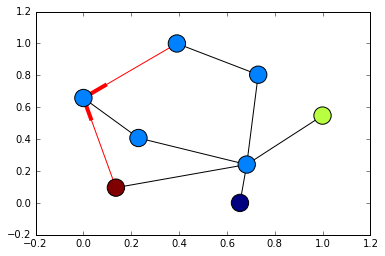

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color = values)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()